In [4]:
# NB: per eseguire questo notebook come file Python, scegliere il menù "File -> Download as -> Python (.py)" .
# Da Canopy, scommentando questa istruzione si hanno i grafici nella console e non in finestre aggiuntive:
#get_ipython().magic(u'matplotlib inline')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sistemi_DLTI import *
import control

In [5]:
N = 16
nx=6
x0 = np.atleast_2d( np.zeros(nx) ).T
A = np.random.rand(nx,nx)
b = np.atleast_2d( np.random.rand(nx) ).T
c = np.atleast_2d( np.random.rand(nx) )
# vediamo per quali combinazioni di misura degli stati il sistema e' osservabile :
# caso di 1 uscita:
for i in range(nx):
  c = np.zeros(nx); c[i]=1.0
  OSS = c.copy()
  for k in range(nx-1):
    OSS = np.vstack((c, OSS@A))
  #endfor
  S = np.linalg.svd(OSS,compute_uv=False)
  print(str(i) + ' :  indice di osservabilita'' = ' + str(len(np.where(S>np.linalg.norm(OSS,2)*1e-16)[0])))
#endfor

0 :  indice di osservabilita = 6
1 :  indice di osservabilita = 6
2 :  indice di osservabilita = 6
3 :  indice di osservabilita = 6
4 :  indice di osservabilita = 6
5 :  indice di osservabilita = 6


In [6]:
nx=6;
u = 0.0 * np.atleast_2d( np.random.rand(N) )
x0 = np.atleast_2d( np.zeros(nx) ).T
Q,R = np.linalg.qr(np.random.randn(nx,nx))
Q = np.asmatrix(Q)
D = 0.1 + np.diag(0.1*np.arange(nx))  # scegliendo gli autovalori di A, impongo una dinamica predefinita al sistema
print("autovalori di A = ",np.diag(D))
A=Q@D@Q.T
b = np.atleast_2d( np.random.rand(nx) ).T
c = np.atleast_2d( np.random.rand(nx) )
h, X_hist = simula_DLTI_StateSpace_discreto(A,b,c,[0],u,x0);
h = np.squeeze(np.array(h))

autovalori di A =  [0.1 0.2 0.3 0.4 0.5 0.6]


In [7]:
# calcola il guadagno dell'osservatore 
desired_eigs = 0.33*np.ones(nx) + 0.005*np.arange(nx)
Ko = np.atleast_2d( control.acker(A.T, c.T, desired_eigs) ).T
Ao = A - Ko*c;
#print np.linalg.eig(Ao)

In [8]:
L,V = np.linalg.eig(Ao)
print("desired eigs modulus = ",np.abs(np.sort(desired_eigs)))
print("actual eigs modulus = ",np.abs(np.sort(L)))

desired eigs modulus =  [0.33  0.335 0.34  0.345 0.35  0.355]
actual eigs modulus =  [0.32999969 0.33500111 0.33999868 0.3450004  0.35000025 0.35499986]


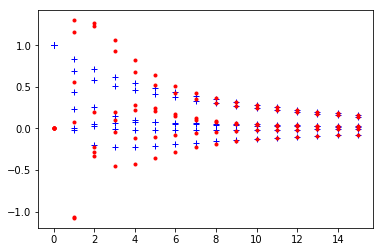

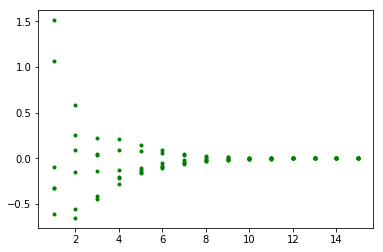

In [9]:
x0_est = np.atleast_2d( np.zeros(nx) ).T
x = 1.0 + x0.copy()
x_est = x0_est.copy()
plt.figure(1); plt.plot(0.,x.T,'b+'); plt.plot(0.,x_est.T,'r.'); 
plt.figure(2);  
y = np.zeros(N)
for i in range(1,N):
  y[i] = c @ x
  x = A @ x  +  b @ np.atleast_2d(u[0,i])
  x_est = Ao @ x_est + b * u[0,i] + Ko * y[i]
  plt.figure(1); plt.plot(i,x.T,'b+'); plt.plot(i,x_est.T,'r.');
  plt.figure(2); plt.plot(i,x.T-x_est.T,'g.');
#endfor
plt.show()